# Taller Validacion Cruzada

# Introducción

En este proyecto se realizó una evaluación comparativa de distintos modelos de regresión aplicados al dataset de Housing.  
El objetivo principal fue predecir el valor medio de las viviendas (`MEDV`) utilizando diferentes algoritmos y validar su desempeño mediante técnicas de validación cruzada.

La metodología seguida fue:

- **Preprocesamiento de datos**: Se eliminó cualquier fila con valores nulos para asegurar que los modelos pudieran entrenarse sin errores asociados a datos faltantes.
- **Separación de variables**: Se definieron las variables predictoras (`X`) y la variable objetivo (`y`).
- **Definición de modelos**: Se seleccionaron tres modelos de regresión distintos para comparar:
  - Regresión Lineal
  - Árbol de Decisión
  - Random Forest
- **Aplicación de validación cruzada (K-Fold)**:  
  Se utilizó validación cruzada con 10 particiones para evaluar de manera robusta el desempeño de cada modelo, utilizando como métrica principal el **coeficiente de determinación (R²)**.
- **Visualización y análisis de resultados**:  
  Se graficaron los resultados obtenidos para cada modelo, permitiendo identificar cuál ofrecía la mejor capacidad predictiva sobre el conjunto de datos.

**Importante**:  
Dado que el problema tratado es de **regresión** (y no de clasificación), no se utilizó matriz de confusión.  
En su lugar, se enfocó el análisis en métricas de error y desempeño como el R² promedio obtenido en cada modelo.

Con esta metodología se logró realizar una comparación objetiva entre modelos tradicionales de regresión, resaltando las ventajas de técnicas más robustas como Random Forest frente a modelos más simples.


In [5]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo general
sns.set(style="whitegrid")

# Cargar dataset
housing_df = pd.read_csv(r"DATASET/HousingData.csv")


# Mostrar las primeras filas para inspección
housing_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
# 1. Verificar cuántos nulos tienes
print(housing_df.isnull().sum())

# 2. Solución rápida: eliminar todas las filas con NaN
housing_df_clean = housing_df.dropna()

# 3. Definir X e y limpios
X = housing_df_clean.drop('MEDV', axis=1)
y = housing_df_clean['MEDV']


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


Evaluando Linear Regression...
Errores R2 de cada fold: [0.82111722 0.75774036 0.51040378 0.83963301 0.56477088 0.84662192
 0.6546093  0.72485338 0.70258794 0.85883174]
Media de los errores r2: 0.7281
Desviación estándar de los errores r2: 0.1154


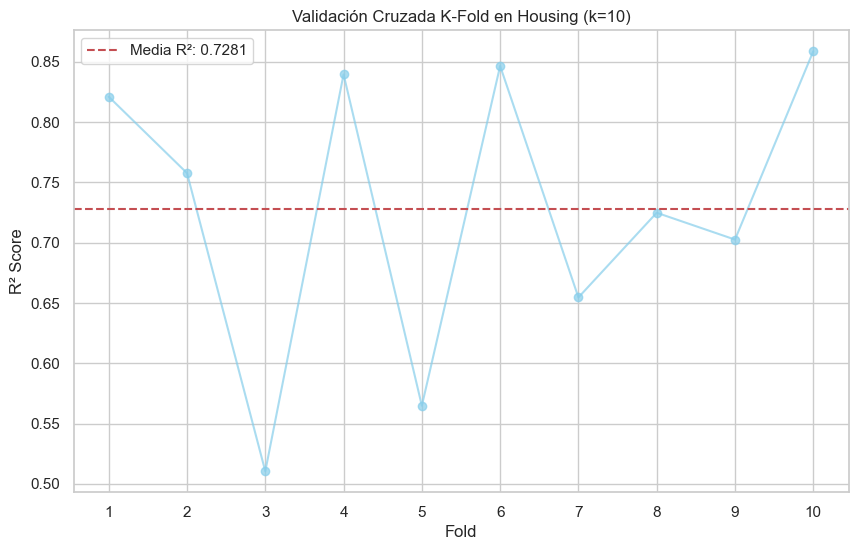

Evaluando Decision Tree...
Errores R2 de cada fold: [ 0.87194842  0.85191721 -0.55013574  0.81258562  0.75555212  0.82901892
  0.93058434  0.89654073  0.59974529  0.79141673]
Media de los errores r2: 0.6789
Desviación estándar de los errores r2: 0.4188


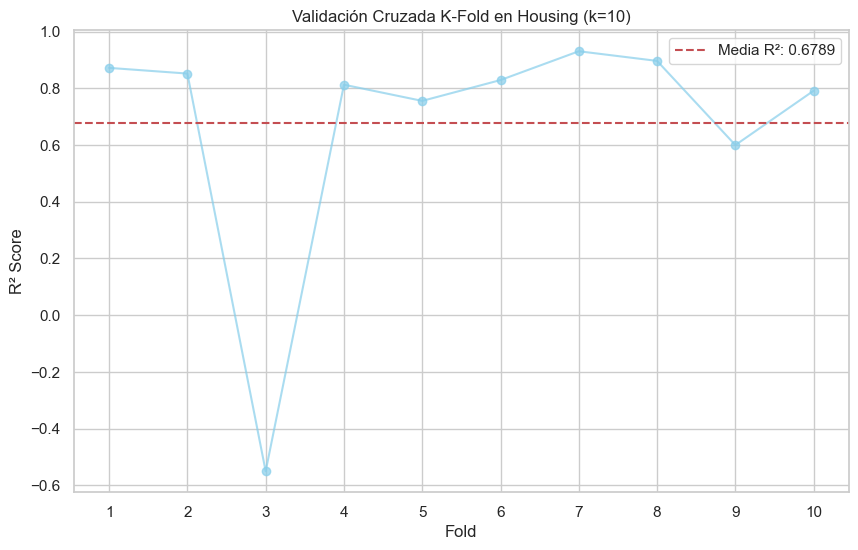

Evaluando Random Forest...
Errores R2 de cada fold: [0.87387973 0.88961575 0.6707213  0.94319254 0.75592807 0.92128131
 0.91036243 0.93675261 0.82808272 0.88741932]
Media de los errores r2: 0.8617
Desviación estándar de los errores r2: 0.0828


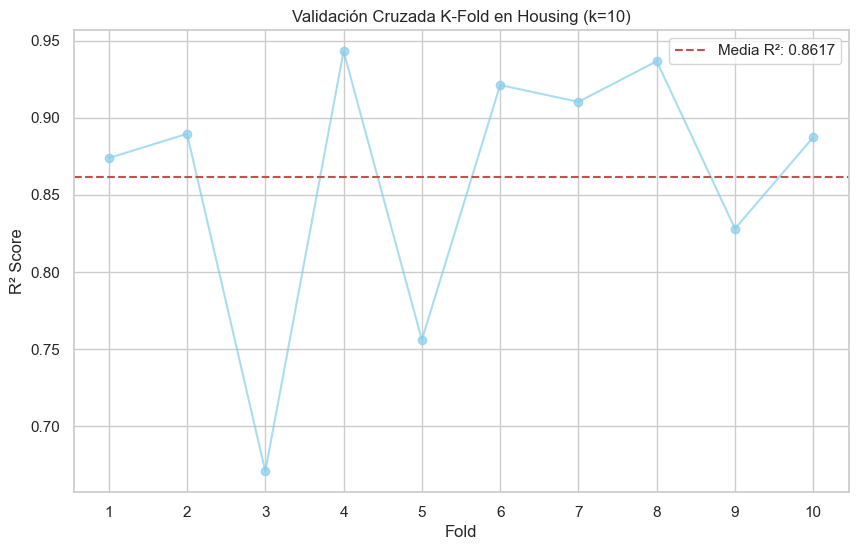

In [13]:
# Importar librerías
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import numpy as np

# 📈 Función para validar usando K-Fold
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def validar_k_fold(model, X, y, k):
    # Configurar K-Fold
    kf = KFold(n_splits=k, shuffle=True, random_state=1)

    # Validación cruzada
    r2_score_values = cross_val_score(model, X, y, cv=kf, scoring="r2")

    # Imprimir métricas
    print(f'Errores R2 de cada fold: {r2_score_values}')
    print(f'Media de los errores r2: {np.mean(r2_score_values):.4f}')
    print(f'Desviación estándar de los errores r2: {np.std(r2_score_values):.4f}')

    # Crear gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, k+1), r2_score_values, marker='o', linestyle='-', color='skyblue', alpha=0.7)
    plt.xlabel('Fold')
    plt.ylabel('R² Score')
    plt.title(f'Validación Cruzada K-Fold en Housing (k={k})')
    plt.xticks(range(1, k+1))
    plt.axhline(np.mean(r2_score_values), color='r', linestyle='--', label=f'Media R²: {np.mean(r2_score_values):.4f}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return np.mean(r2_score_values)

# 🔵 Preprocesar tu dataset de Housing
housing_df_clean = housing_df.dropna()  # Asegurándote que no haya NaNs

# Separar variables predictoras y objetivo
X = housing_df_clean.drop('MEDV', axis=1)
y = housing_df_clean['MEDV']

# Definir número de folds
k = 10

# Modelos a evaluar
modelos = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Diccionario para guardar resultados
resultados = {}

# Evaluar cada modelo y guardar el R² promedio
for nombre, modelo in modelos.items():
    print(f"Evaluando {nombre}...")
    r2_medio = validar_k_fold(modelo, X, y, k)
    resultados[nombre] = r2_medio
    


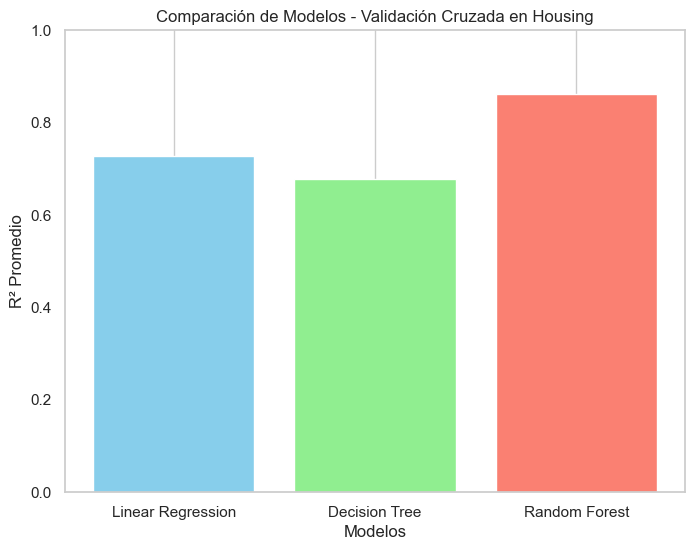

In [10]:
# 📊 Gráfico de barras para comparar R² promedio de cada modelo
import matplotlib.pyplot as plt

# Crear figura
plt.figure(figsize=(8, 6))

# Crear el gráfico de barras
plt.bar(resultados.keys(), resultados.values(), color=['skyblue', 'lightgreen', 'salmon'])

# Etiquetas
plt.xlabel('Modelos')
plt.ylabel('R² Promedio')
plt.title('Comparación de Modelos - Validación Cruzada en Housing')
plt.ylim(0, 1)  # Opcional: fija los límites del eje Y de 0 a 1 para ver mejor las diferencias
plt.grid(axis='y')

# Mostrar
plt.show()
